# ABHINAV KAMBOJ

## AI Assignment 2

Build an ANN model for Drug classification.
This project aims to analyze the relationship between various medical parameters and drug effectiveness. The dataset consists of patient information,
including age, sex, blood pressure levels (BP), cholesterol levels, sodium-to-potassium ratio (Na_to_K), drug type, and corresponding labels. The goal is to
develop a model that can accurately predict the class or category of a given drug based on its features.
Dataset Link: https://www.kaggle.com/datasets/prathamtripathi/drug-classification

## Task 1: Read the dataset and do data pre-processing


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn and sns

In [ ]:
df = pd.read_csv("/content/drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
df.describe(include='all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
df.isnull().sum() # find total missing values for each attribute

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
df.shape

(200, 6)

In [ ]:
df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [ ]:
# encoding the data
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['BP'] = le.fit_transform(df['BP'])
df['Cholesterol'] = le.fit_transform(df['Cholesterol'])

In [ ]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,DrugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,DrugY


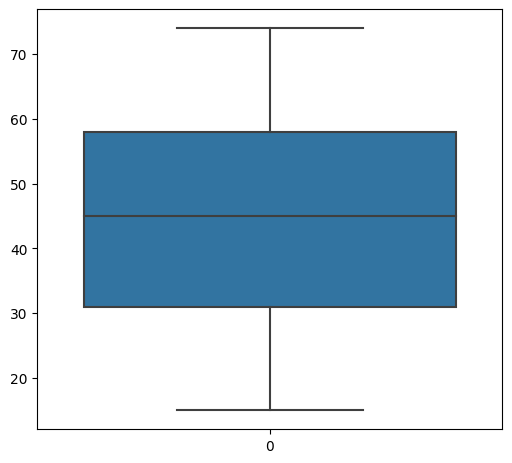

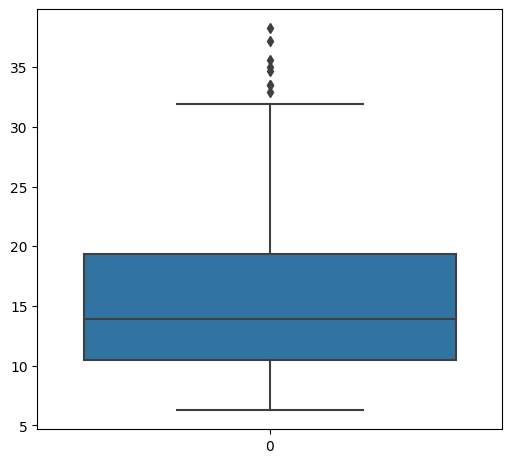

In [ ]:
col = ['Age','Na_to_K']

for i,j in enumerate(col):
  plt.figure(figsize=(6,12))
  plt.subplot(2,1,i+1)
  sns.boxplot(df[j])

In [ ]:
# There are outliers for Na_to_K so lets remove outliers

q1 = df['Na_to_K'].quantile(.25)
q3 = df['Na_to_K'].quantile(.75)
IQR = q3-q1
upper_limit = q3+1.5*IQR
lower_limit = q1-1.5*IQR

df=df[df['Na_to_K']<upper_limit]


<Axes: >

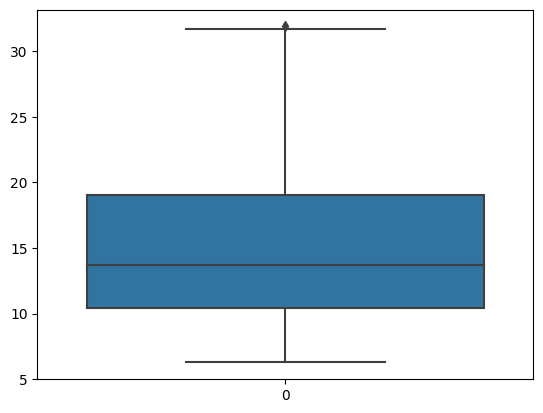

In [ ]:
sns.boxplot(df['Na_to_K']) # outliers imputed with mean value

In [ ]:
df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [ ]:
# Splitting the data into training and testing
X = df.iloc[:,:5].values
y = pd.get_dummies(df['Drug']).values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 12)

## Task 2: Build the ANN model with (input layer, min 3 hidden layers & output layer)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Let us initialize the sequential model
model = Sequential()

#Input layer
model.add(Dense(5,input_dim=5,activation = 'relu'))

#1st hidden layer
model.add(Dense(32,activation='relu'))

#2nd hidden layer
model.add(Dense(16,activation='relu'))

#3rd hidden layer
model.add(Dense(8,activation='relu'))

#Output layer
model.add(Dense(5,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 30        
                                                                 
 dense_1 (Dense)             (None, 32)                192       
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 5)                 45        
                                                                 
Total params: 931
Trainable params: 931
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,epochs=150,batch_size=5,validation_data=(X_test,y_test))

Epoch 1/150
29/29 [==============================] - 2s 13ms/step - loss: 5.0424 - accuracy: 0.4167 - val_loss: 2.1116 - val_accuracy: 0.4792
Epoch 2/150
29/29 [==============================] - 0s 4ms/step - loss: 1.6286 - accuracy: 0.5625 - val_loss: 1.1974 - val_accuracy: 0.5208
Epoch 3/150
29/29 [==============================] - 0s 4ms/step - loss: 1.2159 - accuracy: 0.5903 - val_loss: 1.1529 - val_accuracy: 0.5208
Epoch 4/150
29/29 [==============================] - 0s 4ms/step - loss: 1.1727 - accuracy: 0.5556 - val_loss: 1.1409 - val_accuracy: 0.5208
Epoch 5/150
29/29 [==============================] - 0s 4ms/step - loss: 1.1723 - accuracy: 0.5556 - val_loss: 1.1869 - val_accuracy: 0.5208
Epoch 6/150
29/29 [==============================] - 0s 3ms/step - loss: 1.1496 - accuracy: 0.5903 - val_loss: 1.1211 - val_accuracy: 0.5417
Epoch 7/150
29/29 [==============================] - 0s 4ms/step - loss: 1.1103 - accuracy: 0.5694 - val_loss: 1.1309 - val_accuracy: 0.5208
Epoch 8/150


## Task 3: Test the model with random data

In [ ]:
test = {
    'Age':[49.,24.],
    'Sex':[1.,1.],
    'BP':[0.,0.],
    'Cholesterol':[1.,0.],
    'Na_to_K':[6.269,3.424]
}
test_df = pd.DataFrame(test)
test_df

,Age,Sex,BP,Cholesterol,Na_to_K
0,49.0,1.0,0.0,1.0,6.269
1,24.0,1.0,0.0,0.0,3.424


In [ ]:
model.predict(test_df)

1/1 [==============================] - 0s 116ms/step


array([[2.0588389e-04, 3.2823646e-01, 4.4899479e-01, 2.1603276e-01,
        6.5302192e-03],
       [4.7974795e-04, 8.2157511e-01, 1.5158901e-01, 2.6232084e-02,
        1.2407909e-04]], dtype=float32)